In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #to ignore any warning that may arise
pd.set_option("display.max_rows", None, "display.max_columns", None) #to choose the displace

In [3]:
df = pd.read_csv('project_data.csv')

In [4]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [5]:
def report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


In [7]:
report(df)

,Total NaN,Percent of NaN,Nunique,Dtype
USO_Volume,0,0.0,1716,int64
OS_Low,0,0.0,1471,float64
EG_low,0,0.0,823,float64
EG_close,0,0.0,831,float64
EG_Ajclose,0,0.0,1091,float64
...,...,...,...,...
PLT_High,0,0.0,1600,float64
PLT_Low,0,0.0,1600,float64
PLT_Trend,0,0.0,2,int64
PLD_Price,0,0.0,1560,float64


There is no Nan in the dataset. Almost all the data type are numerical expect the date column.

In [12]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(10,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()

count    1718.000000
mean      127.323434
std        17.526993
min       100.919998
25%       116.220001
50%       121.915001
75%       128.427494
max       173.199997
Name: Open, dtype: float64


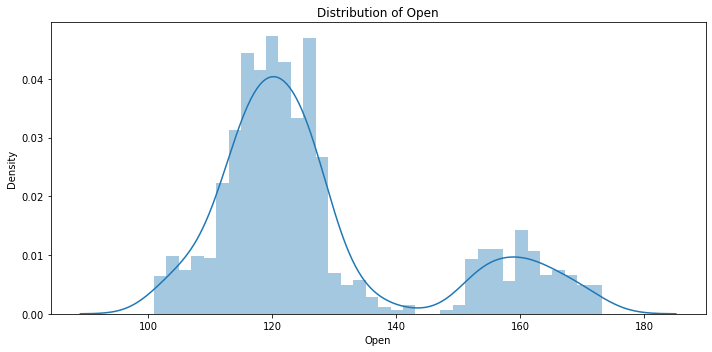

count    1718.000000
mean      127.854237
std        17.631189
min       100.989998
25%       116.540001
50%       122.325001
75%       129.087497
max       174.070007
Name: High, dtype: float64


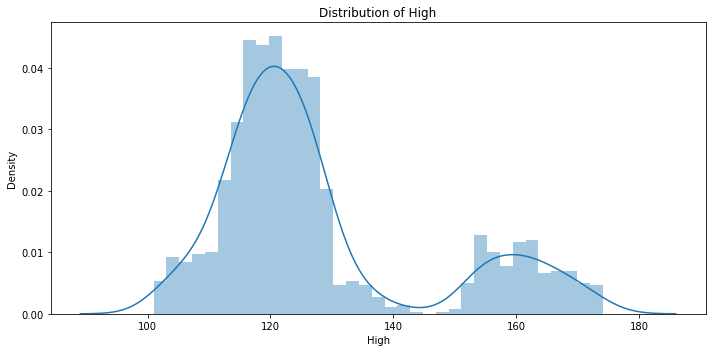

count    1718.000000
mean      126.777695
std        17.396513
min       100.230003
25%       115.739998
50%       121.369999
75%       127.840001
max       172.919998
Name: Low, dtype: float64


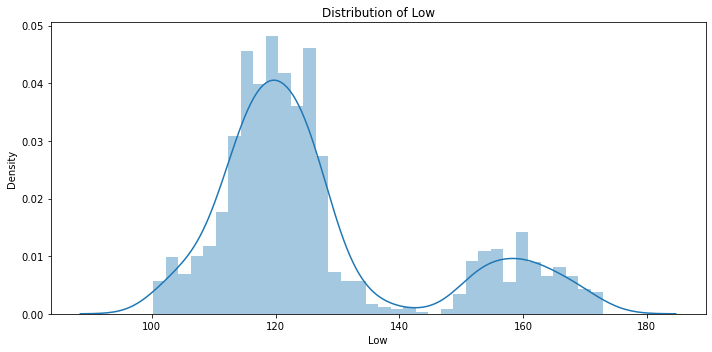

count    1718.000000
mean      127.319482
std        17.536269
min       100.500000
25%       116.052502
50%       121.795002
75%       128.470001
max       173.610001
Name: Close, dtype: float64


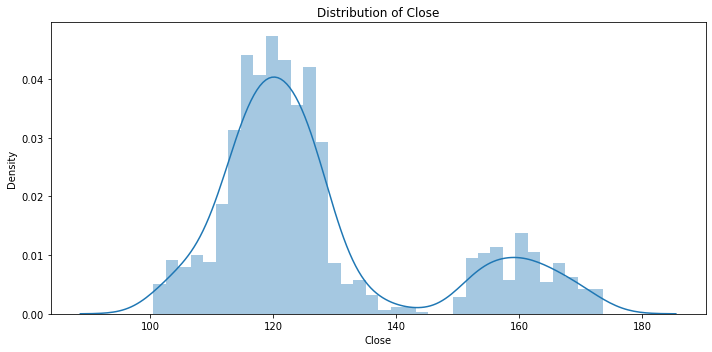

count    1718.000000
mean      127.319482
std        17.536269
min       100.500000
25%       116.052502
50%       121.795002
75%       128.470001
max       173.610001
Name: Adj Close, dtype: float64


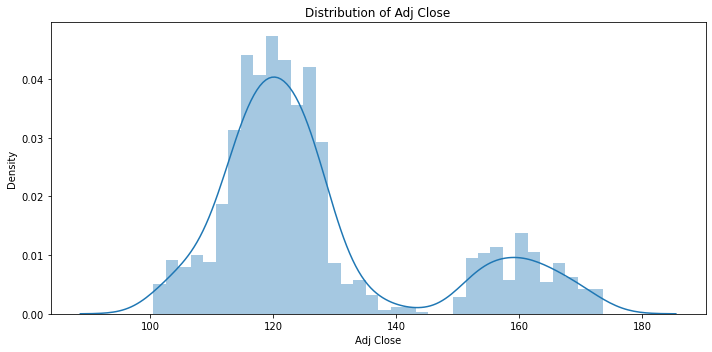

count    1.718000e+03
mean     8.446327e+06
std      4.920731e+06
min      1.501600e+06
25%      5.412925e+06
50%      7.483900e+06
75%      1.020795e+07
max      9.380420e+07
Name: Volume, dtype: float64


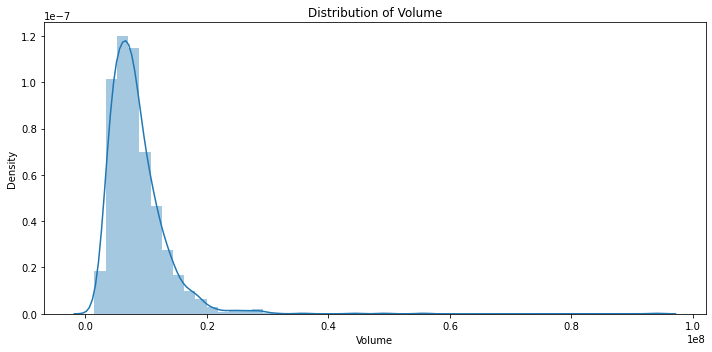

count    1718.000000
mean      204.490023
std        43.831928
min       122.059998
25%       170.392498
50%       205.464996
75%       237.292500
max       293.089996
Name: SP_open, dtype: float64


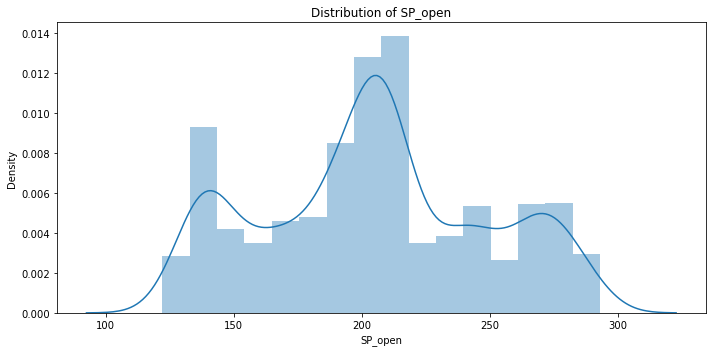

count    1718.000000
mean      205.372637
std        43.974644
min       122.320000
25%       170.962506
50%       206.459999
75%       237.722500
max       293.940002
Name: SP_high, dtype: float64


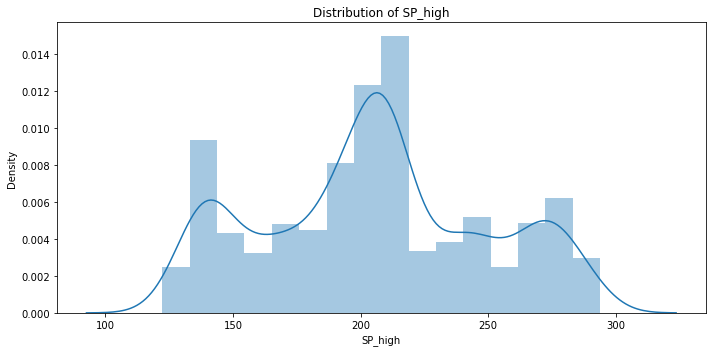

count    1718.000000
mean      203.487014
std        43.618940
min       120.029999
25%       169.577499
50%       204.430000
75%       236.147502
max       291.809998
Name: SP_low, dtype: float64


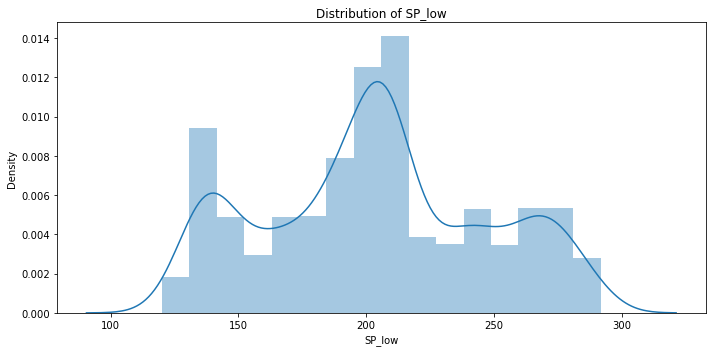

count    1718.000000
mean      204.491222
std        43.776999
min       120.290001
25%       170.397500
50%       205.529998
75%       236.889996
max       293.579987
Name: SP_close, dtype: float64


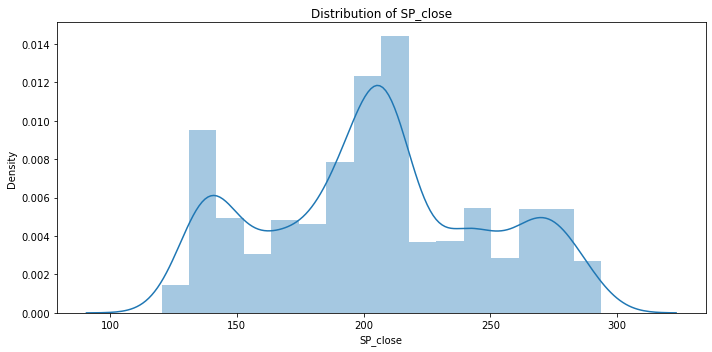

count    1718.000000
mean      192.204570
std        48.514161
min       104.468536
25%       153.027992
50%       191.658341
75%       228.721389
max       290.560242
Name: SP_Ajclose, dtype: float64


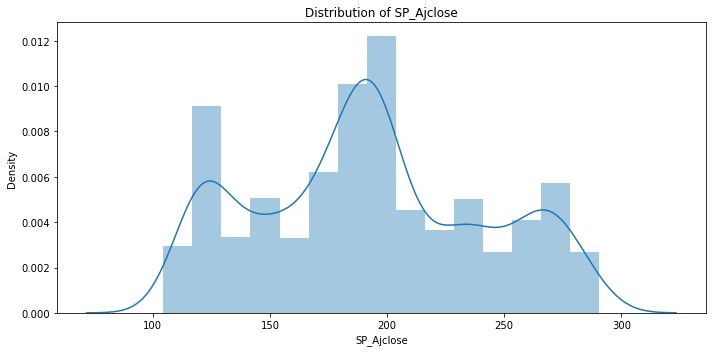

count    1.718000e+03
mean     1.098026e+08
std      4.925110e+07
min      2.785650e+07
25%      7.387085e+07
50%      9.972020e+07
75%      1.351161e+08
max      5.072443e+08
Name: SP_volume, dtype: float64


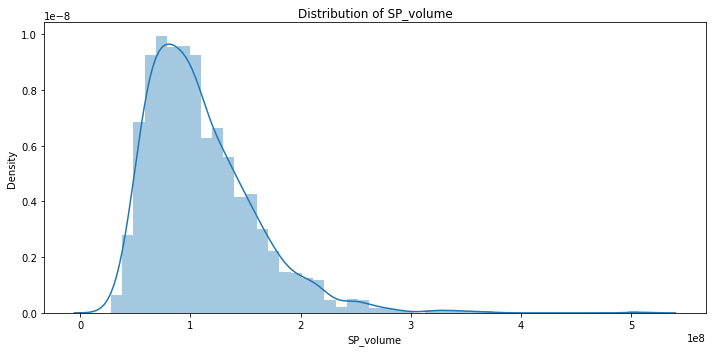

count     1718.000000
mean     18161.094398
std       3889.752079
min      11769.209960
25%      15487.930172
50%      17601.095705
75%      20866.907225
max      26833.470700
Name: DJ_open, dtype: float64


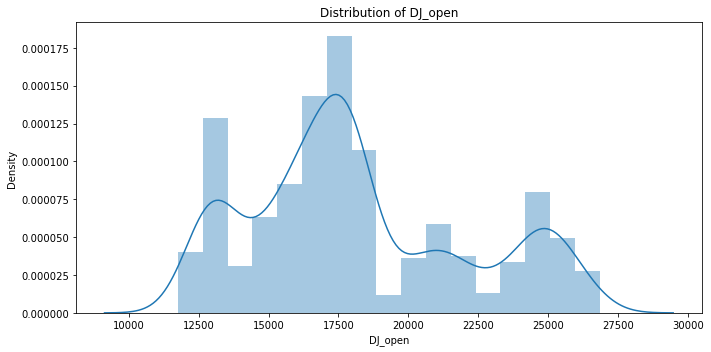

count     1718.000000
mean     18244.137842
std       3906.008604
min      11925.879880
25%      15551.170168
50%      17714.395510
75%      20910.837405
max      26951.810550
Name: DJ_high, dtype: float64


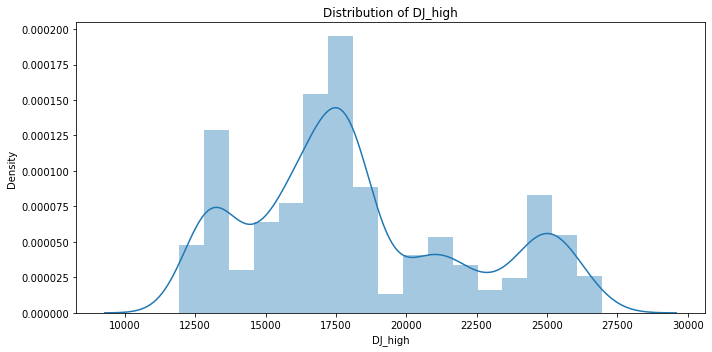

count     1718.000000
mean     18073.889095
std       3867.959072
min      11735.190430
25%      15419.387207
50%      17510.290040
75%      20785.035648
max      26789.080080
Name: DJ_low, dtype: float64


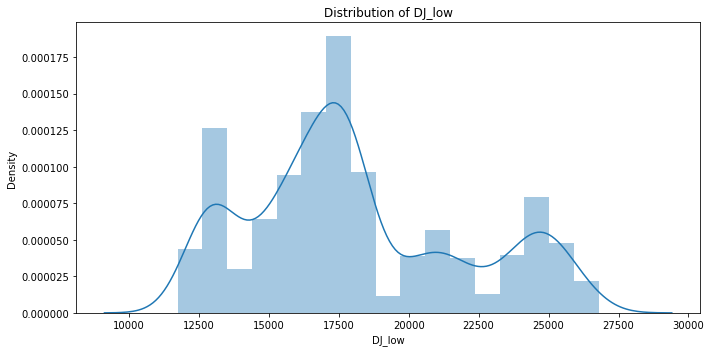

count     1718.000000
mean     18164.119043
std       3884.495887
min      11766.259770
25%      15495.665280
50%      17612.939455
75%      20851.157715
max      26828.390630
Name: DJ_close, dtype: float64


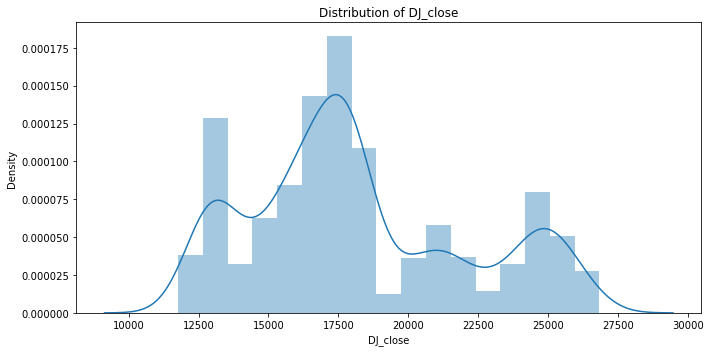

count     1718.000000
mean     18164.119043
std       3884.495887
min      11766.259770
25%      15495.665280
50%      17612.939455
75%      20851.157715
max      26828.390630
Name: DJ_Ajclose, dtype: float64


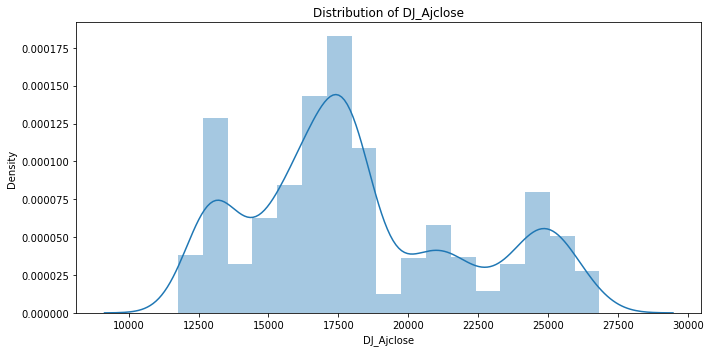

count    1.718000e+03
mean     1.779131e+08
std      1.212753e+08
min      8.410000e+06
25%      9.232000e+07
50%      1.206950e+08
75%      2.636300e+08
max      9.005100e+08
Name: DJ_volume, dtype: float64


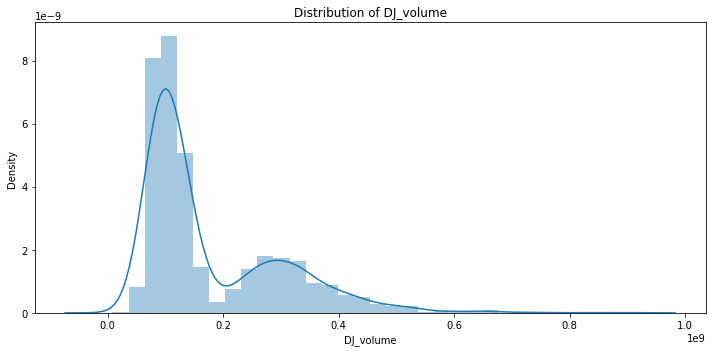

count    1718.000000
mean       28.276554
std        20.325861
min         2.770000
25%        14.200000
50%        22.800000
75%        37.150002
max        80.199997
Name: EG_open, dtype: float64


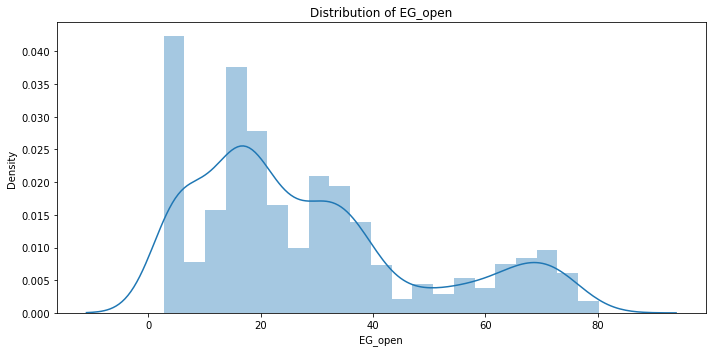

count    1718.000000
mean       28.822555
std        20.620624
min         2.850000
25%        14.550000
50%        23.125000
75%        37.849998
max        81.000000
Name: EG_high, dtype: float64


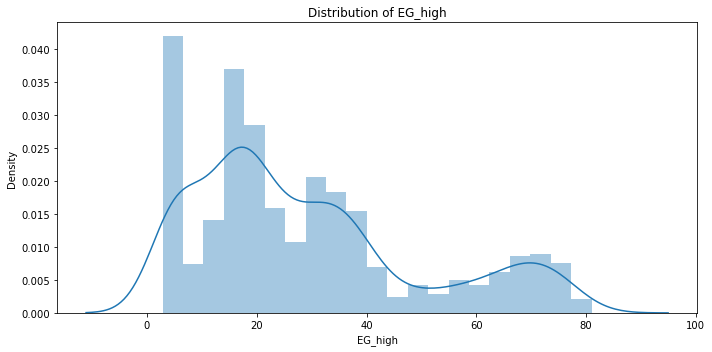

count    1718.000000
mean       27.653655
std        19.972314
min         2.730000
25%        13.762500
50%        21.800000
75%        36.450001
max        77.900002
Name: EG_low, dtype: float64


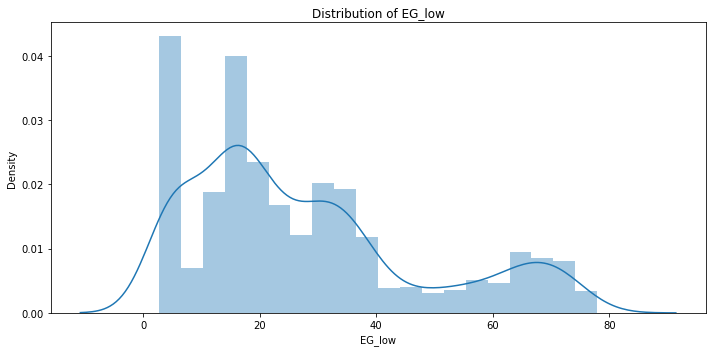

count    1718.000000
mean       28.209302
std        20.294635
min         2.800000
25%        14.150000
50%        22.524999
75%        37.187501
max        79.800003
Name: EG_close, dtype: float64


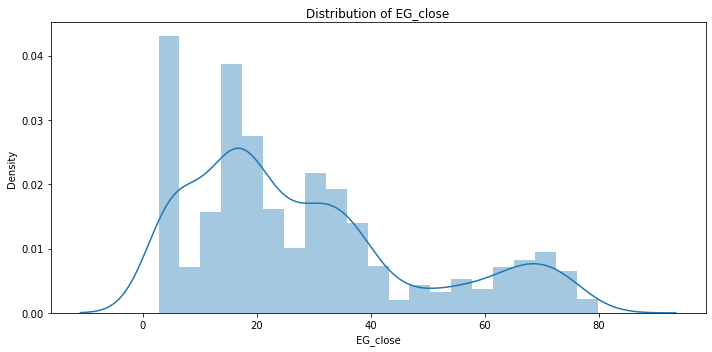

count    1718.000000
mean       27.783958
std        19.721857
min         2.800000
25%        14.082418
50%        22.408089
75%        36.811500
max        77.999313
Name: EG_Ajclose, dtype: float64


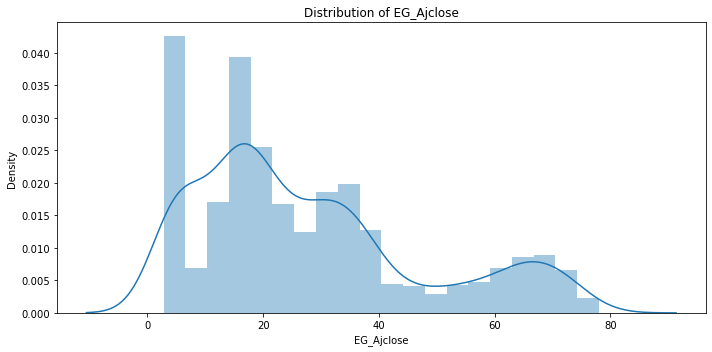

count    1.718000e+03
mean     1.136074e+06
std      7.301289e+05
min      1.645000e+05
25%      7.006250e+05
50%      9.688000e+05
75%      1.344775e+06
max      1.006120e+07
Name: EG_volume, dtype: float64


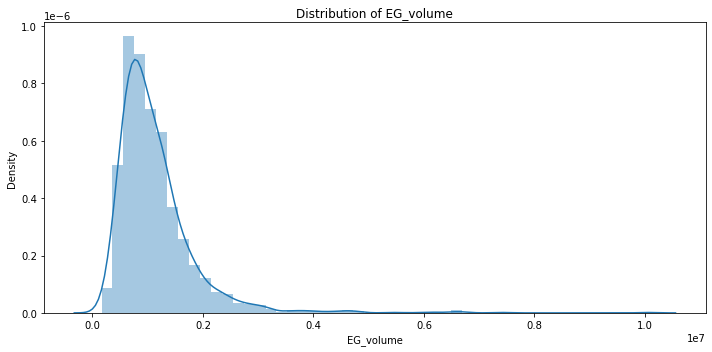

count    1718.000000
mean        1.208494
std         0.100535
min         1.038700
25%         1.120800
50%         1.184050
75%         1.305550
max         1.393400
Name: EU_Price, dtype: float64


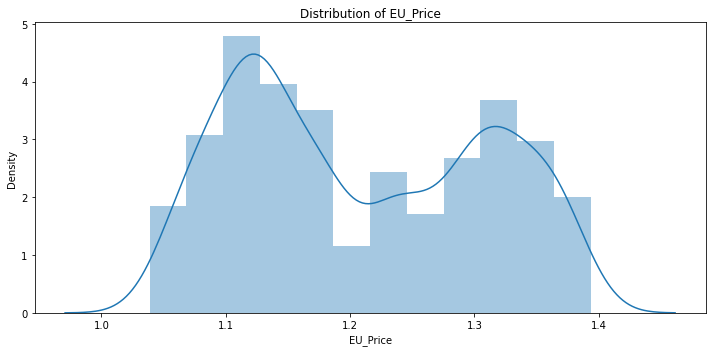

count    1718.000000
mean        1.208531
std         0.100579
min         1.039000
25%         1.120900
50%         1.184100
75%         1.305475
max         1.393300
Name: EU_open, dtype: float64


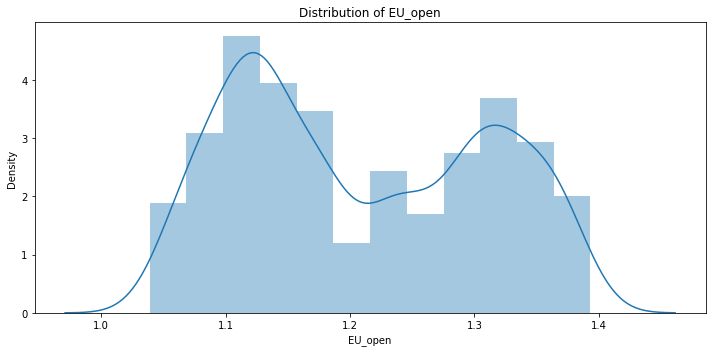

count    1718.000000
mean        1.213360
std         0.100184
min         1.041900
25%         1.125800
50%         1.187850
75%         1.310275
max         1.399300
Name: EU_high, dtype: float64


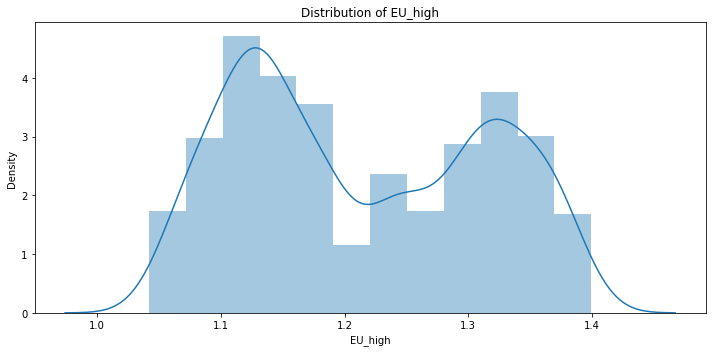

count    1718.000000
mean        1.203692
std         0.100695
min         1.034100
25%         1.115900
50%         1.179450
75%         1.299850
max         1.391000
Name: EU_low, dtype: float64


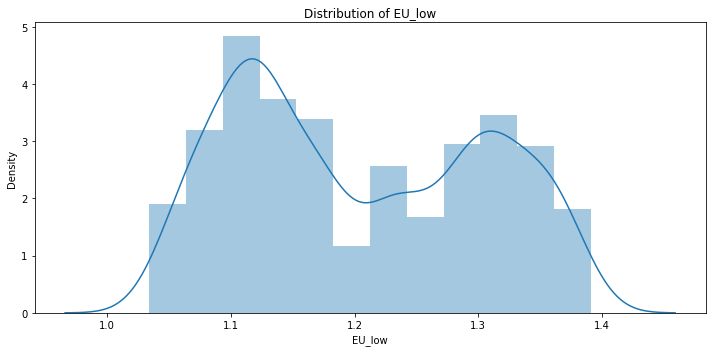

count    1718.000000
mean        0.494761
std         0.500118
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: EU_Trend, dtype: float64


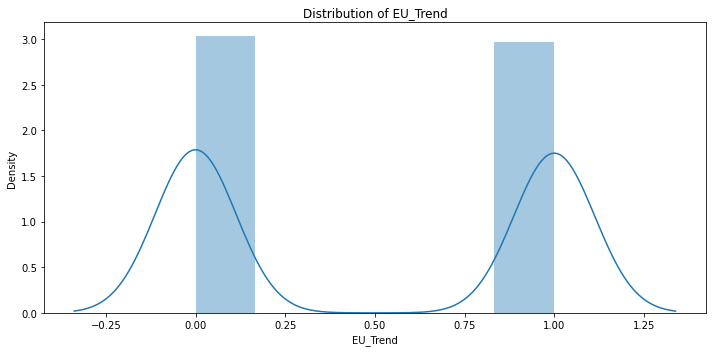

count    1718.000000
mean       77.504523
std        27.400703
min        27.880000
25%        52.152500
50%        70.115000
75%       107.730000
max       126.220000
Name: OF_Price, dtype: float64


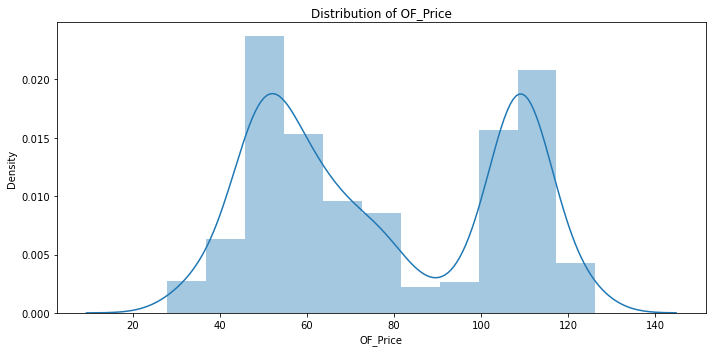

count    1718.000000
mean       77.521740
std        27.366113
min        27.990000
25%        52.202500
50%        70.090000
75%       107.682500
max       126.160000
Name: OF_Open, dtype: float64


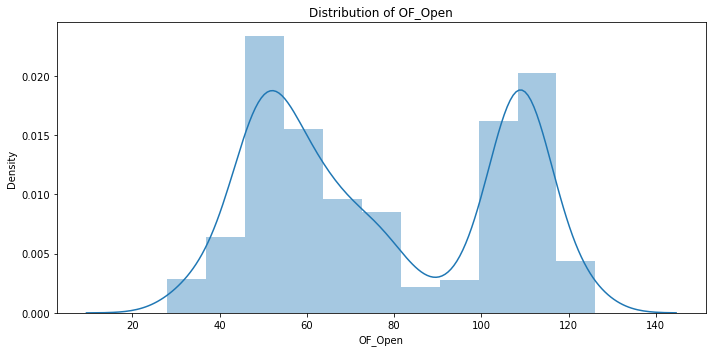

count    1718.000000
mean       78.384936
std        27.393294
min        28.750000
25%        52.862500
50%        70.790000
75%       108.447500
max       128.400000
Name: OF_High, dtype: float64


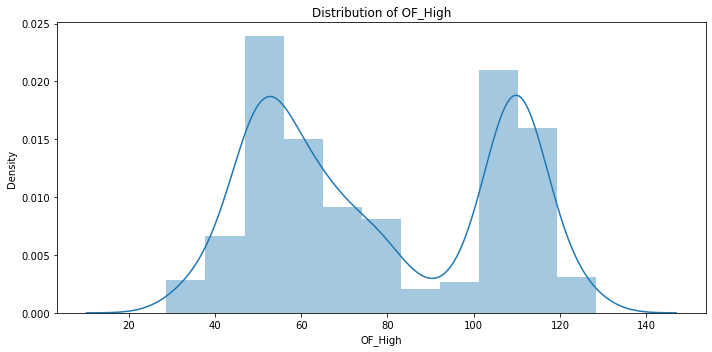

count    1718.000000
mean       76.593894
std        27.322868
min        27.100000
25%        51.362500
50%        69.035000
75%       106.865000
max       125.000000
Name: OF_Low, dtype: float64


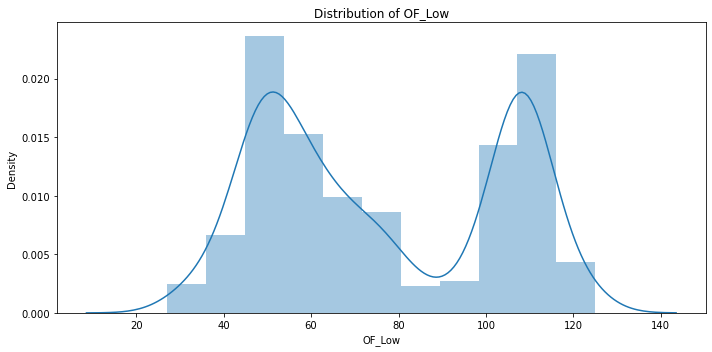

count      1718.000000
mean     225958.585565
std       88844.540581
min       11520.000000
25%      175940.000000
50%      223485.000000
75%      281382.500000
max      567760.000000
Name: OF_Volume, dtype: float64


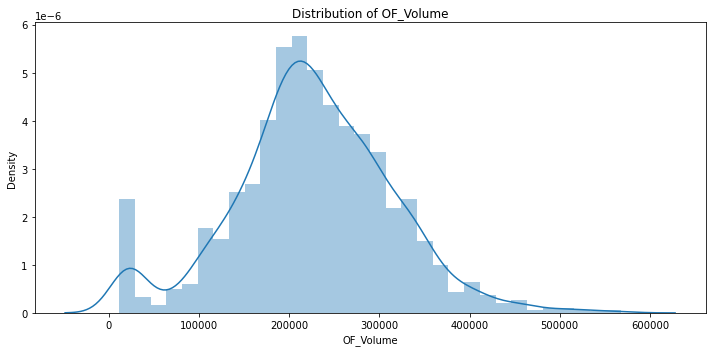

count    1718.000000
mean        0.498836
std         0.500144
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OF_Trend, dtype: float64


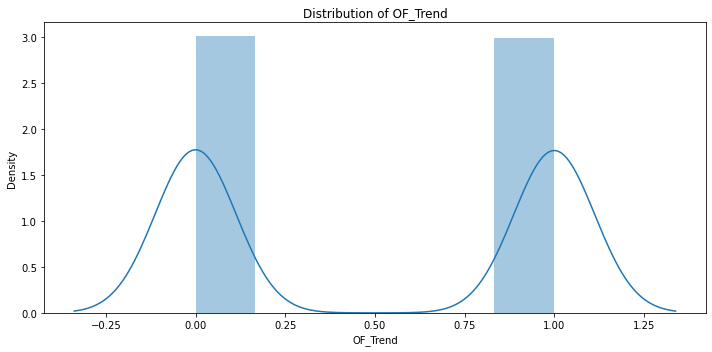

count    1718.000000
mean       70.153097
std        23.471514
min        26.550000
25%        48.922500
50%        64.680000
75%        94.280000
max       110.300000
Name: OS_Price, dtype: float64


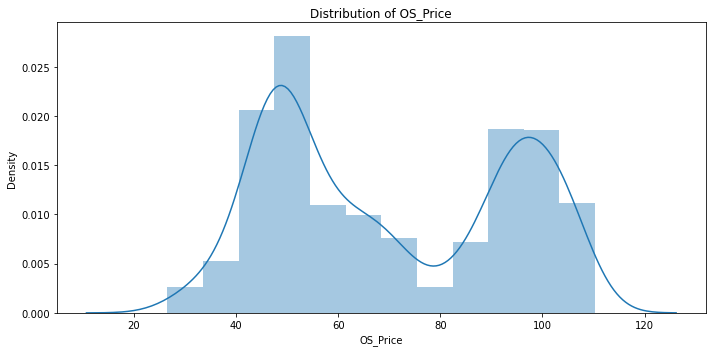

count    1718.000000
mean       70.275396
std        23.480047
min        27.340000
25%        49.030000
50%        64.840000
75%        94.425000
max       110.340000
Name: OS_Open, dtype: float64


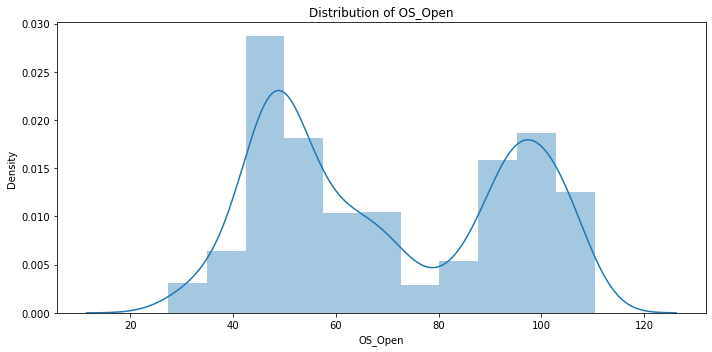

count    1718.000000
mean       71.120256
std        23.494737
min        27.610000
25%        49.692500
50%        65.565000
75%        95.390000
max       112.280000
Name: OS_High, dtype: float64


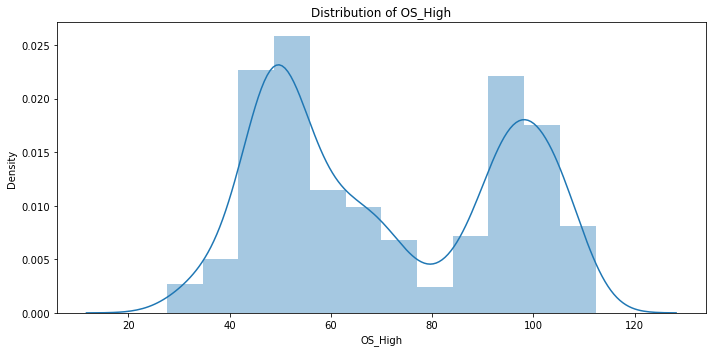

count    1718.000000
mean       69.330990
std        23.422198
min        26.180000
25%        48.200000
50%        63.755000
75%        93.475000
max       109.150000
Name: OS_Low, dtype: float64


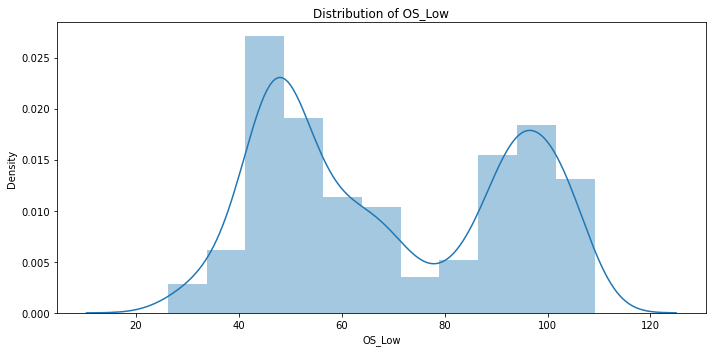

count    1718.000000
mean        0.503492
std         0.500133
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OS_Trend, dtype: float64


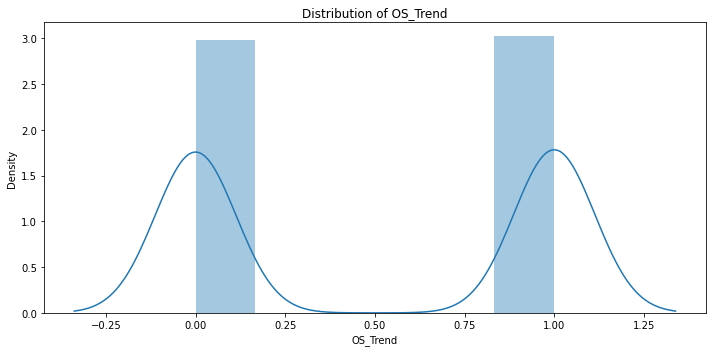

count     1718.000000
mean     43284.478463
std       7530.704012
min      33170.000000
25%      38018.750000
50%      40521.500000
75%      46580.500000
max      65292.000000
Name: SF_Price, dtype: float64


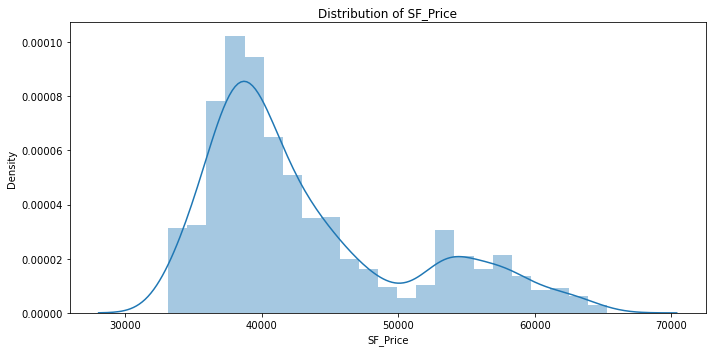

count     1718.000000
mean     43308.692084
std       7550.423242
min      33146.000000
25%      38028.750000
50%      40528.000000
75%      46661.250000
max      65400.000000
Name: SF_Open, dtype: float64


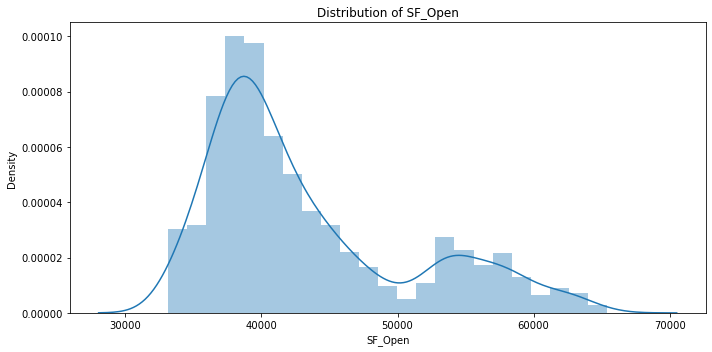

count     1718.000000
mean     43671.194412
std       7614.302267
min      33566.000000
25%      38293.500000
50%      40841.000000
75%      47071.000000
max      65723.000000
Name: SF_High, dtype: float64


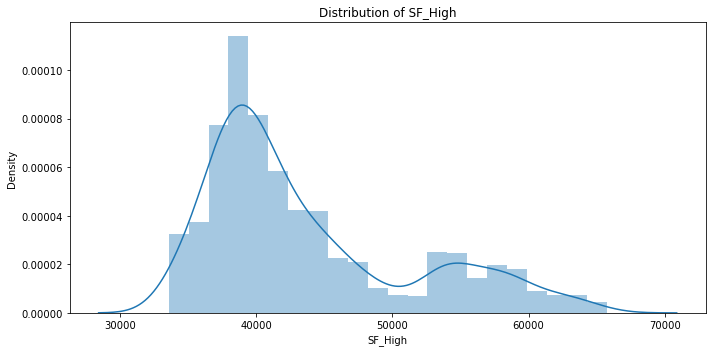

count     1718.000000
mean     42911.912107
std       7443.076538
min      32626.000000
25%      37690.250000
50%      40239.000000
75%      46133.250000
max      64132.000000
Name: SF_Low, dtype: float64


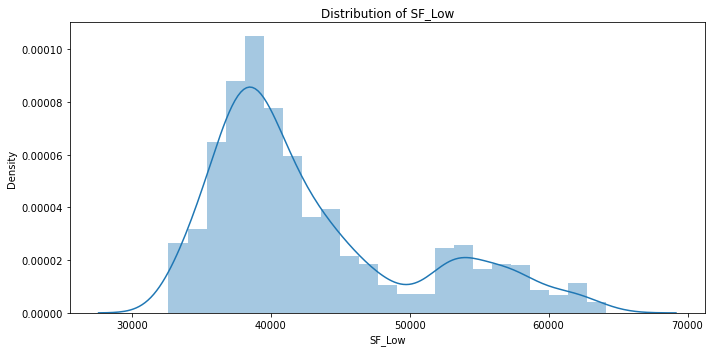

count      1718.000000
mean      26912.462165
std       21880.969122
min          40.000000
25%       14210.000000
50%       19645.000000
75%       29915.000000
max      203730.000000
Name: SF_Volume, dtype: float64


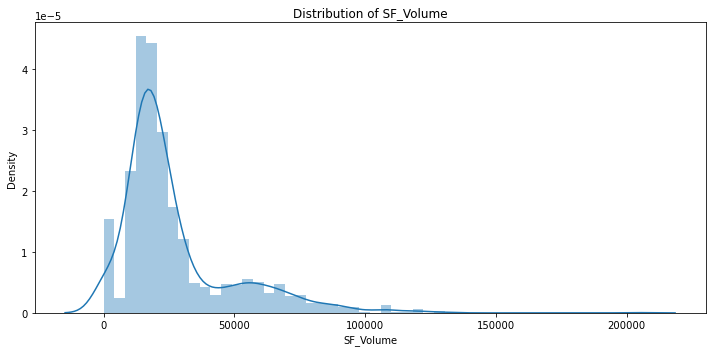

count    1718.000000
mean        0.480792
std         0.499776
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SF_Trend, dtype: float64


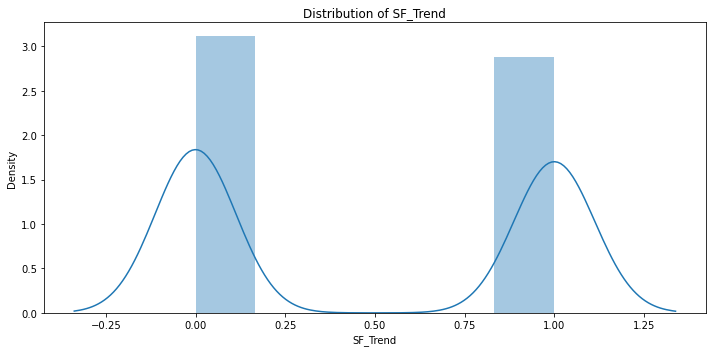

count    1718.000000
mean        2.262769
std         0.433469
min         1.358000
25%         1.905250
50%         2.259000
75%         2.597000
max         3.239000
Name: USB_Price, dtype: float64


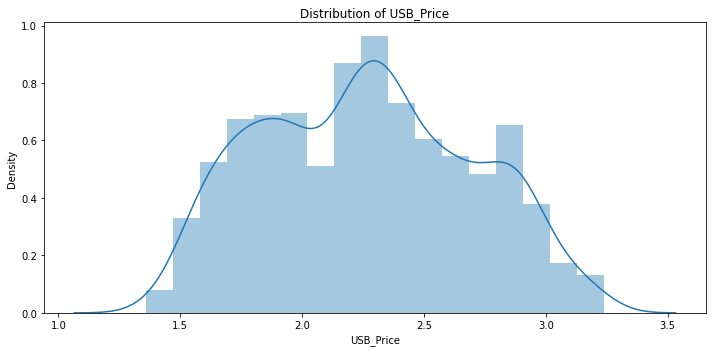

count    1718.000000
mean        2.263091
std         0.433977
min         1.366000
25%         1.905000
50%         2.259000
75%         2.597750
max         3.237000
Name: USB_Open, dtype: float64


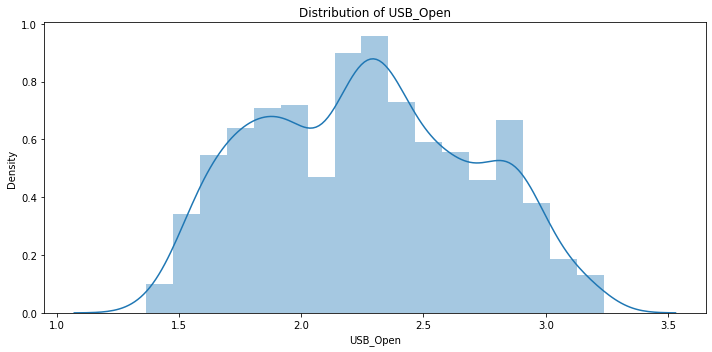

count    1718.000000
mean        2.286512
std         0.437574
min         1.391000
25%         1.920250
50%         2.290000
75%         2.620000
max         3.261000
Name: USB_High, dtype: float64


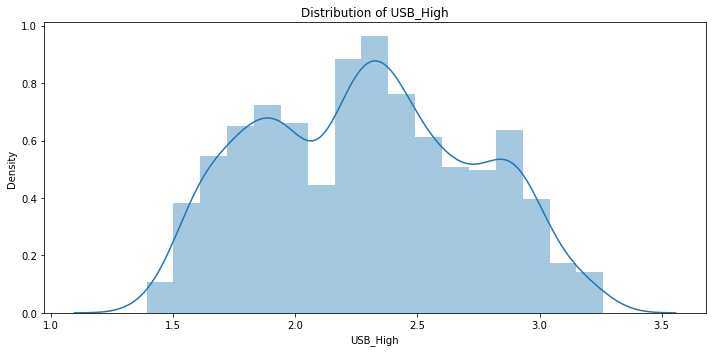

count    1718.000000
mean        2.238765
std         0.429960
min         1.321000
25%         1.886250
50%         2.230000
75%         2.575000
max         3.231000
Name: USB_Low, dtype: float64


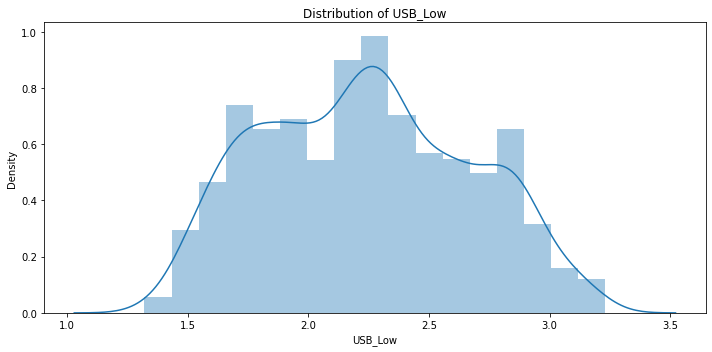

count    1718.000000
mean        0.490105
std         0.500048
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: USB_Trend, dtype: float64


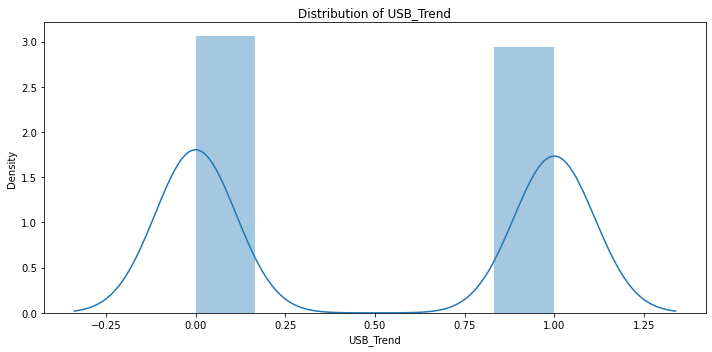

count    1718.000000
mean     1183.915425
std       273.842095
min       775.600000
25%       944.075000
50%      1098.025000
75%      1442.862500
max      1737.600000
Name: PLT_Price, dtype: float64


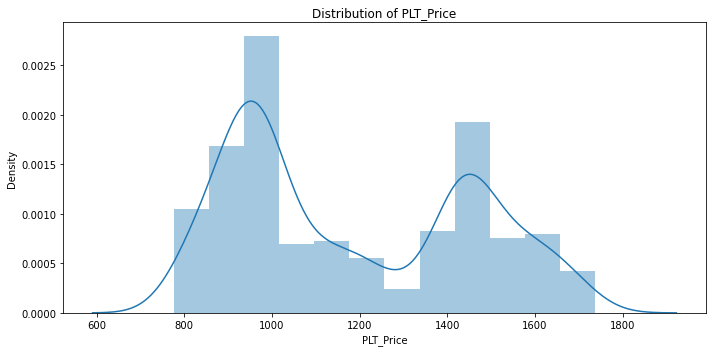

count    1718.000000
mean     1184.388853
std       273.978168
min       765.300000
25%       944.025000
50%      1098.175000
75%      1442.812500
max      1737.800000
Name: PLT_Open, dtype: float64


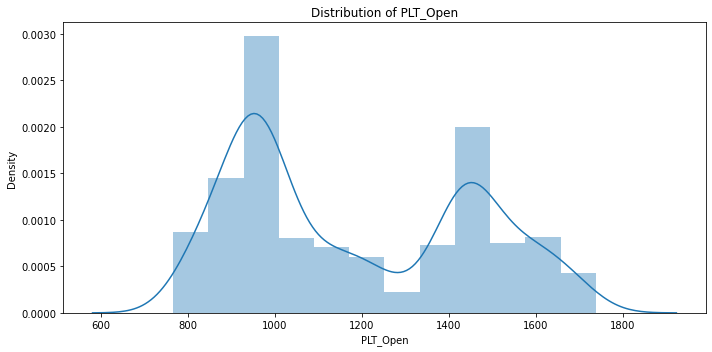

count    1718.000000
mean     1194.274622
std       275.427791
min       786.500000
25%       952.650000
50%      1107.525000
75%      1454.287500
max      1742.900000
Name: PLT_High, dtype: float64


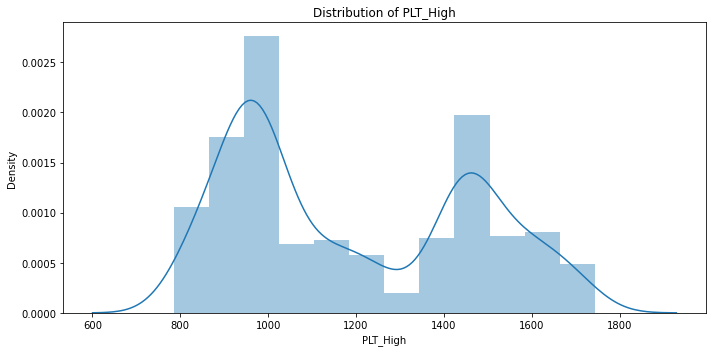

count    1718.000000
mean     1173.409692
std       271.799909
min       756.000000
25%       935.850000
50%      1086.550000
75%      1432.087500
max      1717.150000
Name: PLT_Low, dtype: float64


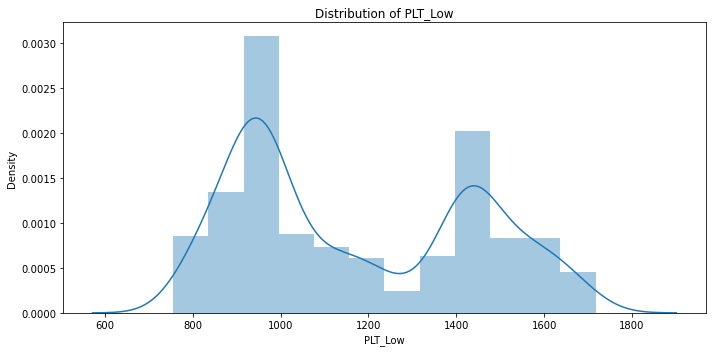

count    1718.000000
mean        0.484284
std         0.499898
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: PLT_Trend, dtype: float64


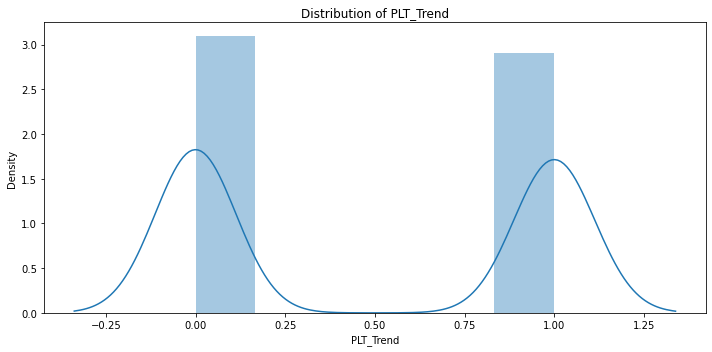

count    1718.000000
mean      766.805122
std       148.307189
min       470.450000
25%       663.212500
50%       748.300000
75%       848.200000
max      1197.500000
Name: PLD_Price, dtype: float64


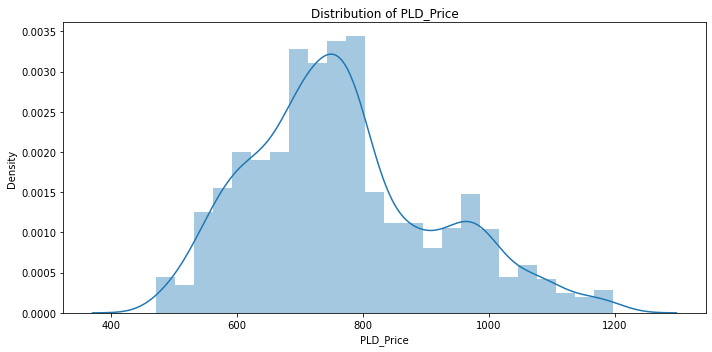

count    1718.000000
mean      766.363481
std       148.078365
min       458.600000
25%       663.287500
50%       748.000000
75%       846.700000
max      1196.000000
Name: PLD_Open, dtype: float64


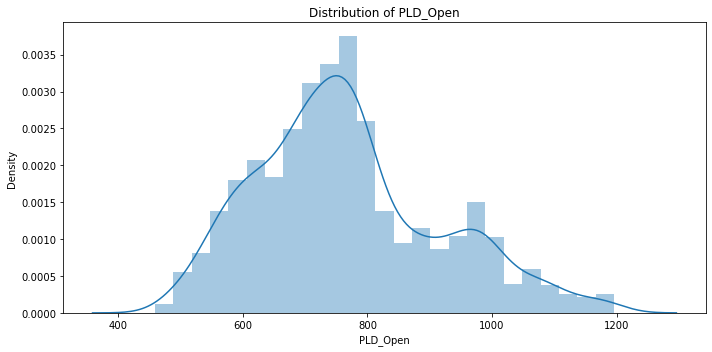

count    1718.000000
mean      773.529302
std       149.010291
min       473.150000
25%       670.162500
50%       753.800000
75%       855.600000
max      1208.700000
Name: PLD_High, dtype: float64


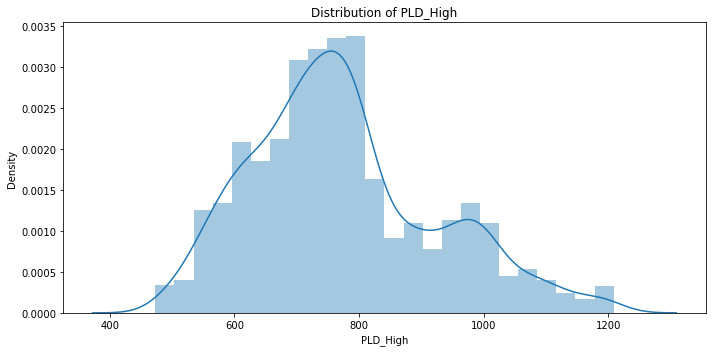

count    1718.000000
mean      759.444208
std       147.381087
min       458.600000
25%       657.025000
50%       742.450000
75%       840.112500
max      1183.600000
Name: PLD_Low, dtype: float64


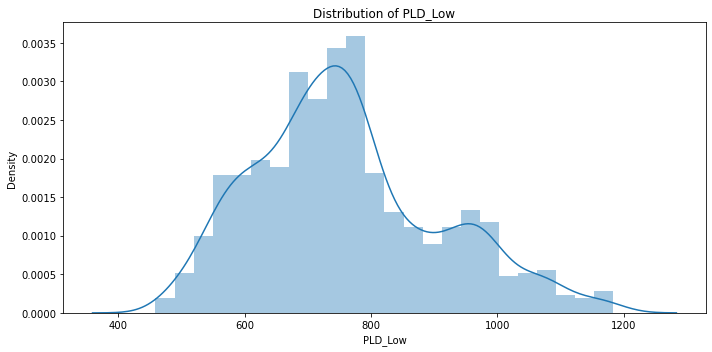

count    1718.000000
mean        0.530850
std         0.499193
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PLD_Trend, dtype: float64


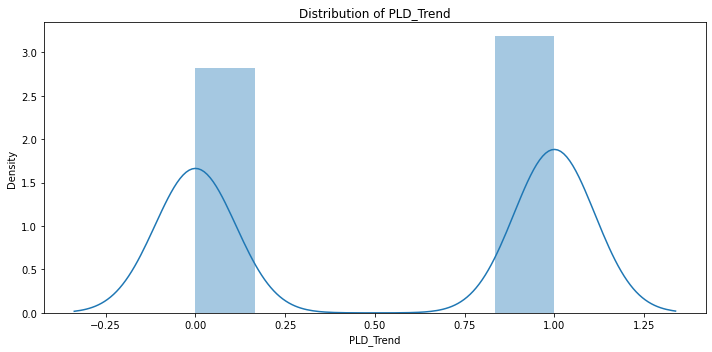

count    1718.000000
mean     1130.442375
std       570.012881
min         0.000000
25%       785.000000
50%      1100.000000
75%      1307.500000
max      2600.000000
Name: RHO_PRICE, dtype: float64


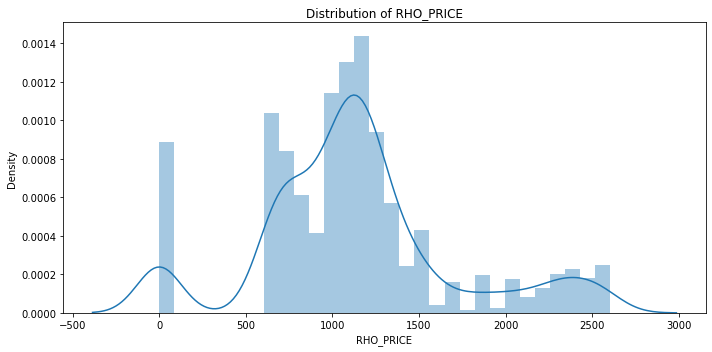

count    1718.000000
mean       89.809427
std         7.516115
min        78.300000
25%        81.380250
50%        92.883500
75%        96.103750
max       103.288000
Name: USDI_Price, dtype: float64


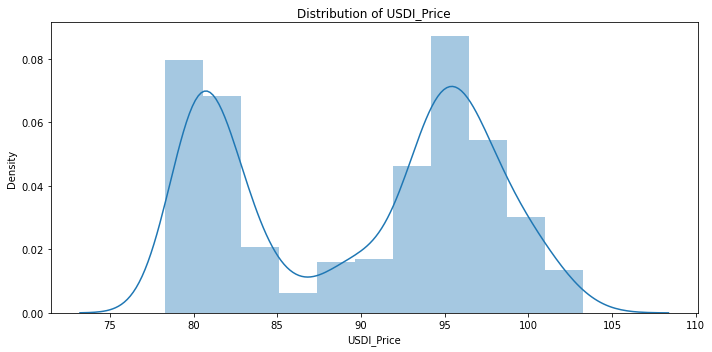

count    1718.000000
mean       89.805442
std         7.520788
min        78.220000
25%        81.380000
50%        92.905000
75%        96.115000
max       103.350000
Name: USDI_Open, dtype: float64


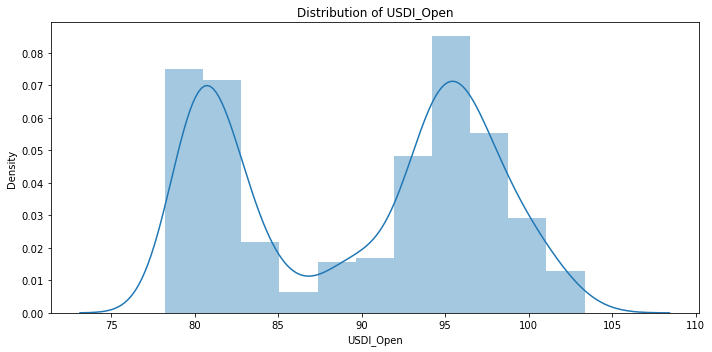

count    1718.000000
mean       90.098981
std         7.567895
min        78.640000
25%        81.617500
50%        93.155000
75%        96.472500
max       103.815000
Name: USDI_High, dtype: float64


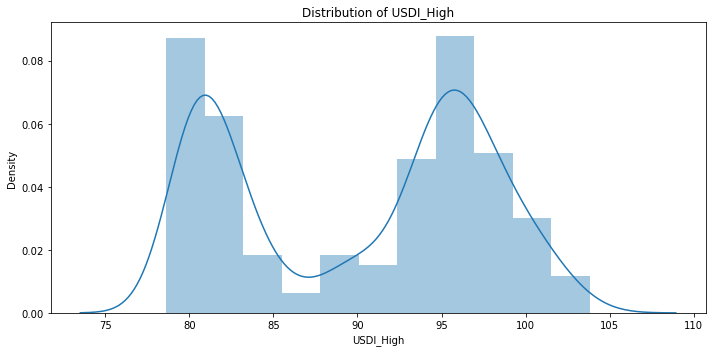

count    1718.000000
mean       89.509331
std         7.459269
min        78.120000
25%        81.111250
50%        92.572500
75%        95.730000
max       102.975000
Name: USDI_Low, dtype: float64


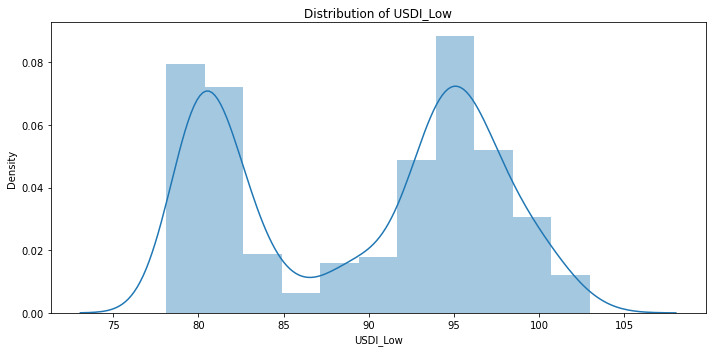

count      1718.000000
mean      27568.300349
std       14643.314699
min          60.000000
25%       18137.500000
50%       24445.000000
75%       33745.000000
max      142820.000000
Name: USDI_Volume, dtype: float64


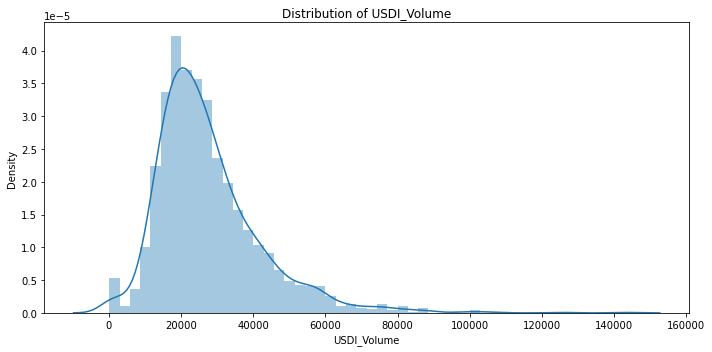

count    1718.000000
mean        0.512806
std         0.499982
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: USDI_Trend, dtype: float64


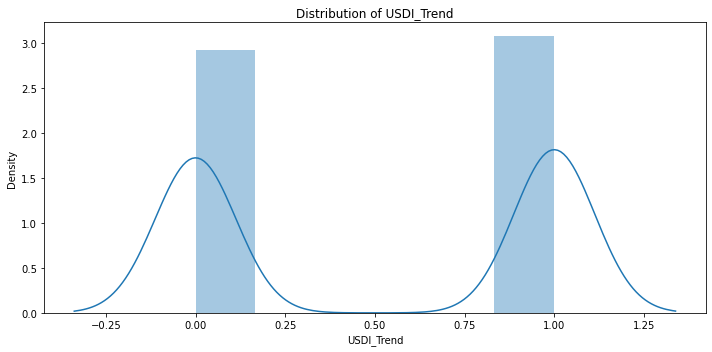

count    1718.000000
mean       26.747427
std        10.620552
min        12.700000
25%        20.642499
50%        23.115001
75%        27.430001
max        57.520000
Name: GDX_Open, dtype: float64


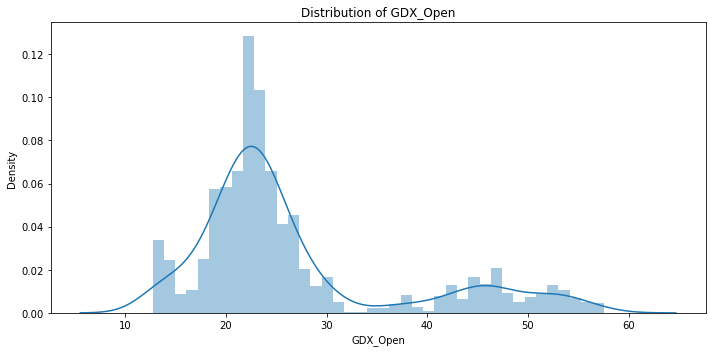

count    1718.000000
mean       27.071304
std        10.706388
min        12.920000
25%        20.952500
50%        23.370001
75%        27.770000
max        57.939999
Name: GDX_High, dtype: float64


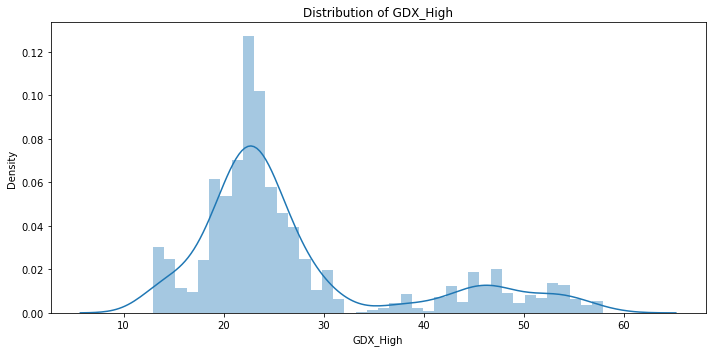

count    1718.000000
mean       26.384575
std        10.490908
min        12.400000
25%        20.355000
50%        22.870001
75%        26.797500
max        56.770000
Name: GDX_Low, dtype: float64


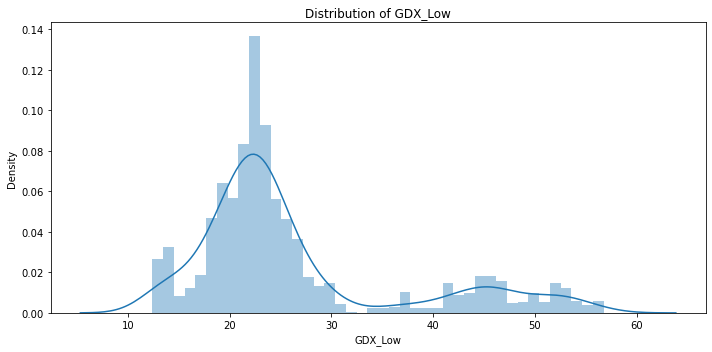

count    1718.000000
mean       26.715012
std        10.603110
min        12.470000
25%        20.585000
50%        23.054999
75%        27.317500
max        57.470001
Name: GDX_Close, dtype: float64


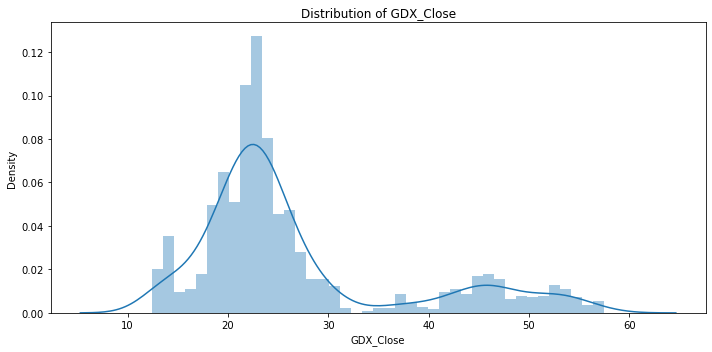

count    1718.000000
mean       25.924624
std         9.886570
min        12.269618
25%        20.180950
50%        22.677603
75%        26.478154
max        54.617039
Name: GDX_Adj Close, dtype: float64


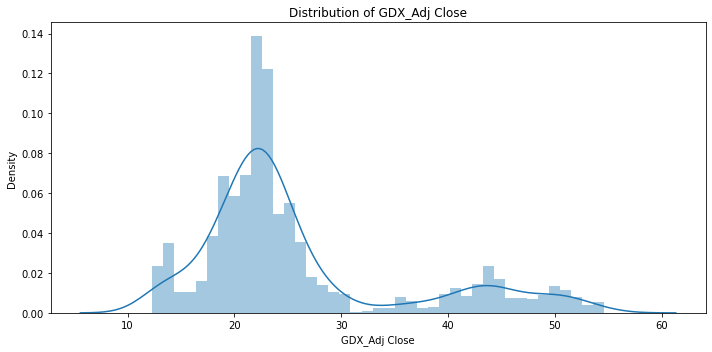

count    1.718000e+03
mean     4.356515e+07
std      2.909151e+07
min      4.729000e+06
25%      2.259968e+07
50%      3.730465e+07
75%      5.697055e+07
max      2.321536e+08
Name: GDX_Volume, dtype: float64


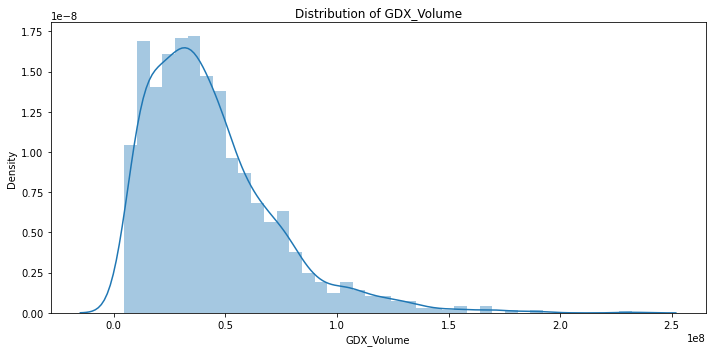

count    1718.000000
mean       22.113417
std        11.431056
min         7.820000
25%        11.420000
50%        16.450000
75%        34.419998
max        41.599998
Name: USO_Open, dtype: float64


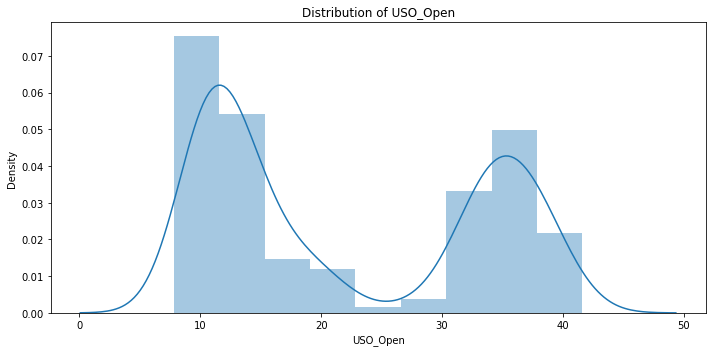

count    1718.000000
mean       22.307148
std        11.478671
min         8.030000
25%        11.500000
50%        16.635001
75%        34.667499
max        42.299999
Name: USO_High, dtype: float64


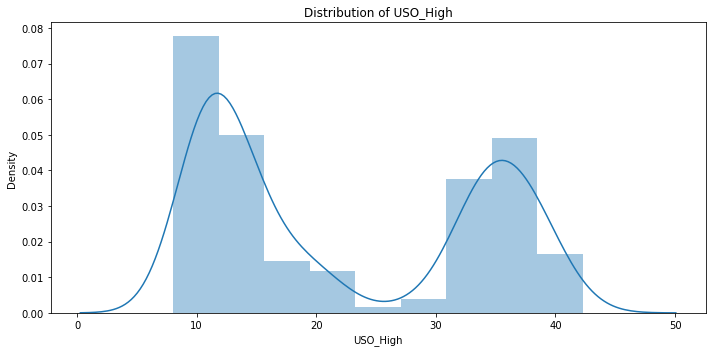

count    1718.000000
mean       21.904657
std        11.373997
min         7.670000
25%        11.300000
50%        16.040000
75%        34.110000
max        41.299999
Name: USO_Low, dtype: float64


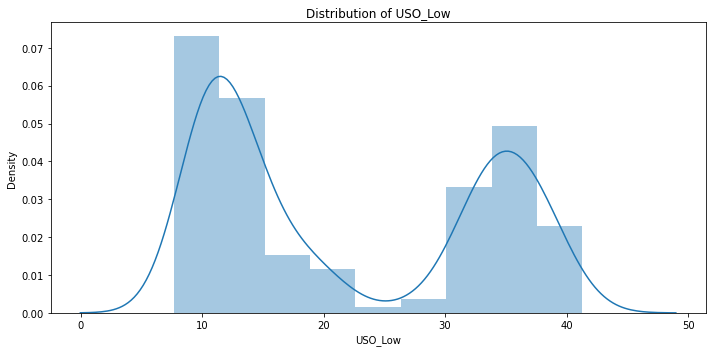

count    1718.000000
mean       22.109051
std        11.432787
min         7.960000
25%        11.392500
50%        16.345000
75%        34.417499
max        42.009998
Name: USO_Close, dtype: float64


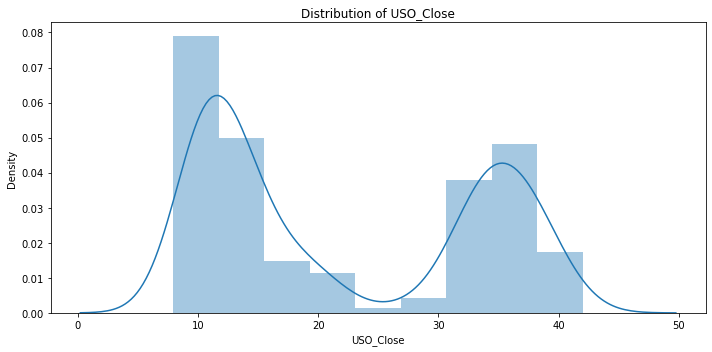

count    1718.000000
mean       22.109051
std        11.432787
min         7.960000
25%        11.392500
50%        16.345000
75%        34.417499
max        42.009998
Name: USO_Adj Close, dtype: float64


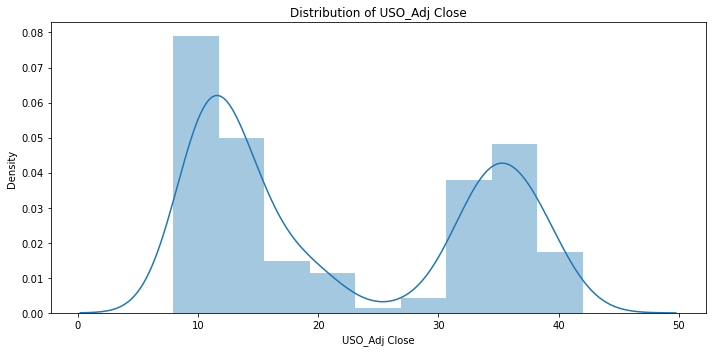

count    1.718000e+03
mean     1.922313e+07
std      1.575743e+07
min      1.035100e+06
25%      6.229500e+06
50%      1.613015e+07
75%      2.672375e+07
max      1.102657e+08
Name: USO_Volume, dtype: float64


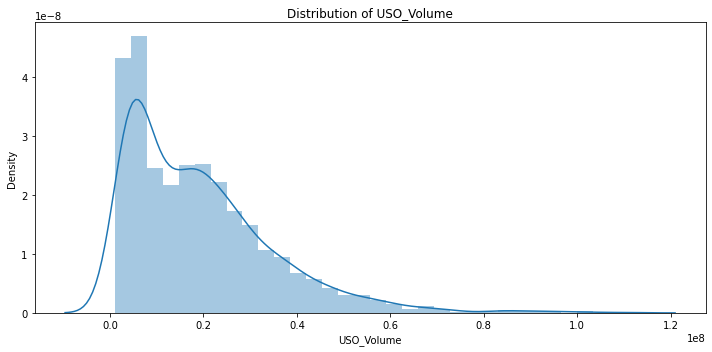

In [13]:
numeric_distribution_plot(df)